# Importing and loading in

Importing relevant python libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Converting fpkms.csv into a pandas dataframe and viewing it, set "t_name"  and "gene_name" to a column index to make pulling out row for "FBtr0331261" easier (from 03_time_course.ipynb lesson)

In [2]:
df_fpkms = pd.read_csv("~/qbb2021/data/fpkms.csv", index_col = "t_name")
df_fpkms

,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
t_name,,,,,,,,,,,,,,,,,
FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591


# MA plot

Save fpkms for female early and late in development

In [3]:
df_samples = df_fpkms.loc[:,["female_10","female_14D"]]
df_samples

,female_10,female_14D
t_name,,
FBtr0114258,0.000000,0.00000
FBtr0346770,0.000000,0.00000
FBtr0302440,0.000000,0.00000
FBtr0302347,21.894249,17.20257
FBtr0346769,0.000000,0.00000
...,...,...
FBtr0114187,0.000000,0.00000
FBtr0304147,0.000000,0.00000
FBtr0114216,13.475658,1.98591


Obtain A using equation from en.wikipedia.org/wiki/MA_plot
Operate on values in each row of df_samples, log2 from numpy
R = "female_14D" fpkms
G = "female_10" fpkms

In [4]:
A = 0.5 * np.log2((df_samples.loc[:,"female_14D"]+1)*(df_samples.loc[:,"female_10"]+1))
A

t_name
FBtr0114258    0.000000
FBtr0346770    0.000000
FBtr0302440    0.000000
FBtr0302347    4.351492
FBtr0346769    0.000000
                 ...   
FBtr0114187    0.000000
FBtr0304147    0.000000
FBtr0114216    2.716864
FBtr0114222    0.000000
FBtr0114283    0.000000
Length: 34718, dtype: float64

Obtain M using equation from en.wikipedia.org/wiki/MA_plot
Operate on values in each row of df_samples, log2 from numpy
R = "female_14D" fpkms
G = "female_10" fpkms

In [5]:
M = np.log2((df_samples.loc[:,"female_14D"]+1)/(df_samples.loc[:,"female_10"]+1))
M

t_name
FBtr0114258    0.000000
FBtr0346770    0.000000
FBtr0302440    0.000000
FBtr0302347   -0.330843
FBtr0346769    0.000000
                 ...   
FBtr0114187    0.000000
FBtr0304147    0.000000
FBtr0114216   -2.277386
FBtr0114222    0.000000
FBtr0114283    0.000000
Length: 34718, dtype: float64

Use matplotlib to plot M v. A with title and axes labels

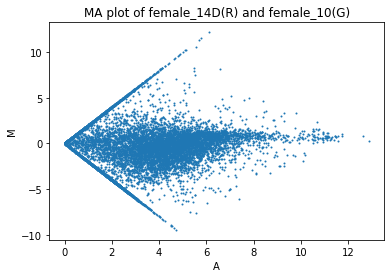

In [6]:
fig, ax = plt.subplots()
ax.scatter(A, M, s=1)
ax.set_title("MA plot of female_14D(R) and female_10(G)")
ax.set_xlabel("A")
ax.set_ylabel("M")
plt.show()

# Time course plot

Get row for "FBtr0331261" using .loc

In [7]:
df_sxl = df_fpkms.loc["FBtr0331261",:]
df_sxl

gene_name         Sxl
male_10             0
male_11             0
male_12             0
male_13             0
male_14A            0
male_14B            0
male_14C            0
male_14D      2.11732
female_10           0
female_11           0
female_12           0
female_13           0
female_14A    46.0339
female_14B    30.6056
female_14C    38.9564
female_14D    124.908
Name: FBtr0331261, dtype: object

Take y series for males and females pre- and during Stage 14, define x series for different stages

In [10]:
ym = df_sxl[1:9]
yf = df_sxl[9:]

ym14 = df_sxl[5:9]
yf14 = df_sxl[13:]

xt = ["10", "11", "12", "13", "14A", "14B", "14C", "14D"]
xt14 = ["14A", "14B", "14C", "14D"]

Plot all 4 series using matplotlib, with correct color coding and symbols
Add title, axes labels, and legend for each of the 4 series

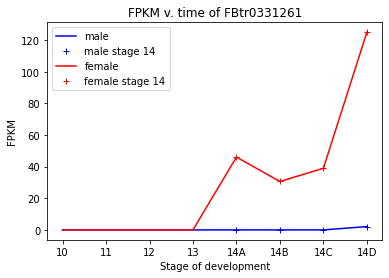

In [11]:
fig1, ax1 = plt.subplots()

ax1.plot(xt, ym, color="blue", label="male")
ax1.plot(xt14, ym14, "+", color="blue", label="male stage 14")
ax1.plot(xt, yf, color="red", label="female")
ax1.plot(xt14, yf14, "+", color="red", label="female stage 14")

ax1.set_title("FPKM v. time of FBtr0331261")
ax1.set_xlabel("Stage of development")
ax1.set_ylabel("FPKM")
ax1.legend()

plt.show()